In [ ]:
pip install pandas


In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Access the Excel file from Google Drive
file_path = '/content/drive/My Drive/MHD.xlsx'
df = pd.read_excel(file_path)
df = pd.read_excel(file_path)

# Display the dataset columns
print("Columns in the dataset:")
print(df.columns)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Columns in the dataset:
Index(['Year', 'Funding levels', 'staffing levels', 'Patient outcome',
       'Emergency referall', 'Discharges', 'Associated emergency readmissions',
       'Urgent crisis referalls', 'Access_to_care_waiting_time', 'Geographic',
       'Geographic-1', 'Gender', 'Age', 'Indicator_value_patient_satisfaction',
       'Indicator_value_Policy_changes', 'Region'],
      dtype='object')


#**Check for missing values in the dataset**

In [ ]:
missing_values = df.isna().sum()
print("\nMissing values in the dataset:")
print(missing_values)


Missing values in the dataset:
Year                                    254
Funding levels                           60
staffing levels                           1
Patient outcome                           1
Emergency referall                        1
Discharges                              228
Associated emergency readmissions       228
Urgent crisis referalls                   1
Access_to_care_waiting_time             162
Geographic                                0
Geographic-1                              0
Gender                                  339
Age                                     332
Indicator_value_patient_satisfaction    100
Indicator_value_Policy_changes            0
Region                                    0
dtype: int64


In [ ]:
print(df.dtypes)


Year                                    float64
Funding levels                          float64
staffing levels                          object
Patient outcome                          object
Emergency referall                      float64
Discharges                              float64
Associated emergency readmissions       float64
Urgent crisis referalls                 float64
Access_to_care_waiting_time             float64
Geographic                               object
Geographic-1                             object
Gender                                   object
Age                                     float64
Indicator_value_patient_satisfaction     object
Indicator_value_Policy_changes            int64
Region                                   object
dtype: object


In [ ]:
# Convert problematic columns to numeric data types
problematic_columns = ['staffing levels', 'Patient outcome', 'Indicator_value_patient_satisfaction']
for column in problematic_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')


#Numeric and categorical missing values column fill up by Mean and Mode

In [ ]:
# Define numeric_columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values in numeric columns with the mean
for column in numeric_columns:
    df[column] = df[column].fillna(df[column].mean())

# Impute missing values in categorical columns with the mode
categorical_columns = ['Geographic', 'Gender', 'Region']
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

# Check for missing values in the dataset after filling them with the mean or mode
missing_values = df.isna().sum()
print("\nMissing values in the dataset after handling:")
print(missing_values)




Missing values in the dataset after handling:
Year                                    0
Funding levels                          0
staffing levels                         0
Patient outcome                         0
Emergency referall                      0
Discharges                              0
Associated emergency readmissions       0
Urgent crisis referalls                 0
Access_to_care_waiting_time             0
Geographic                              0
Geographic-1                            0
Gender                                  0
Age                                     0
Indicator_value_patient_satisfaction    0
Indicator_value_Policy_changes          0
Region                                  0
dtype: int64


#New dataset Generate


In [ ]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Define the number of data points want to generate
num_data_points = 100

# Create a dictionary with keys as column names and values as lists of generated data
data = {
    'num_professionals_pre_cuts': np.random.randint(50, 300, num_data_points),
    'num_professionals_post_cuts': np.random.randint(30, 250, num_data_points),
    'waiting_time_pre_cuts': np.random.uniform(5, 30, num_data_points),
    'waiting_time_post_cuts': np.random.uniform(10, 40, num_data_points),
    'service_accessibility_pre_cuts': np.random.uniform(0.6, 1, num_data_points),
    'service_accessibility_post_cuts': np.random.uniform(0.3, 0.9, num_data_points),
    'hospitalization_rate_pre_cuts': np.random.uniform(0.1, 0.5, num_data_points),
    'hospitalization_rate_post_cuts': np.random.uniform(0.2, 0.6, num_data_points),
    'readmission_rate_pre_cuts': np.random.uniform(0.05, 0.25, num_data_points),
    'readmission_rate_post_cuts': np.random.uniform(0.1, 0.3, num_data_points),
    'patient_satisfaction_pre_cuts': np.random.uniform(7, 10, num_data_points),
    'patient_satisfaction_post_cuts': np.random.uniform(5, 9, num_data_points),
    'service_utilization_pre_cuts': np.random.randint(500, 3000, num_data_points)
}

# Create a pandas DataFrame from the generated data
synthetic_df = pd.DataFrame(data)

# Show the first few rows of the synthetic data
print(synthetic_df.head())


   num_professionals_pre_cuts  num_professionals_post_cuts  \
0                         152                          231   
1                         229                          219   
2                         142                           43   
3                          64                          124   
4                         156                           77   

   waiting_time_pre_cuts  waiting_time_post_cuts  \
0              20.835094               31.365377   
1              26.786515               17.117473   
2              25.091802               19.761991   
3               9.664251               32.394742   
4              27.313975               29.488987   

   service_accessibility_pre_cuts  service_accessibility_post_cuts  \
0                        0.934392                         0.679102   
1                        0.878390                         0.569067   
2                        0.763581                         0.475926   
3                        0.669318 

In [ ]:
print(df.columns)
print(synthetic_df.columns)


Index(['Year', 'Funding levels', 'staffing levels', 'Patient outcome',
       'Emergency referall', 'Discharges', 'Associated emergency readmissions',
       'Urgent crisis referalls', 'Access_to_care_waiting_time', 'Geographic',
       'Geographic-1', 'Gender', 'Age', 'Indicator_value_patient_satisfaction',
       'Indicator_value_Policy_changes', 'Region'],
      dtype='object')
Index(['num_professionals_pre_cuts', 'num_professionals_post_cuts',
       'waiting_time_pre_cuts', 'waiting_time_post_cuts',
       'service_accessibility_pre_cuts', 'service_accessibility_post_cuts',
       'hospitalization_rate_pre_cuts', 'hospitalization_rate_post_cuts',
       'readmission_rate_pre_cuts', 'readmission_rate_post_cuts',
       'patient_satisfaction_pre_cuts', 'patient_satisfaction_post_cuts',
       'service_utilization_pre_cuts'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Concatenate the two data frames vertically
combined_df = pd.concat([df, synthetic_df], axis=0, ignore_index=True)
# Show the first few rows of the combined data frame
print(combined_df.head())

     Year  Funding levels  staffing levels  Patient outcome  \
0  2022.0            13.8         384683.0         210277.0   
1  2021.0            13.8           1515.0            550.0   
2  2020.0            14.8           4220.0           1465.0   
3  2019.0            14.8           3655.0           1210.0   
4  2018.0            11.1           4190.0           1495.0   

   Emergency referall  Discharges  Associated emergency readmissions  \
0              4315.0     11015.0                              390.0   
1                 5.0     12935.0                              420.0   
2                20.0     22650.0                             1195.0   
3                20.0     13000.0                              525.0   
4                 0.0     48195.0                             2130.0   

   Urgent crisis referalls  Access_to_care_waiting_time   Geographic  ...  \
0                  52528.0                         35.0  1. Airedale  ...   
1                    200.0        

In [ ]:
# Fill in missing values in numeric columns with mean
combined_df.fillna(combined_df.mean(), inplace=True)

# Fill in missing values in categorical columns with mode
combined_df.fillna(combined_df.mode().iloc[0], inplace=True)


<ipython-input-267-0429d5980e32>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  combined_df.fillna(combined_df.mean(), inplace=True)


In [ ]:
print(combined_df.head())

     Year  Funding levels  staffing levels  Patient outcome  \
0  2022.0            13.8         384683.0         210277.0   
1  2021.0            13.8           1515.0            550.0   
2  2020.0            14.8           4220.0           1465.0   
3  2019.0            14.8           3655.0           1210.0   
4  2018.0            11.1           4190.0           1495.0   

   Emergency referall  Discharges  Associated emergency readmissions  \
0              4315.0     11015.0                              390.0   
1                 5.0     12935.0                              420.0   
2                20.0     22650.0                             1195.0   
3                20.0     13000.0                              525.0   
4                 0.0     48195.0                             2130.0   

   Urgent crisis referalls  Access_to_care_waiting_time   Geographic  ...  \
0                  52528.0                         35.0  1. Airedale  ...   
1                    200.0        

In [ ]:
region_avg_professionals = combined_df.groupby("Geographic-1")["num_professionals_pre_cuts", "num_professionals_post_cuts"].mean()
top_20_regions = region_avg_professionals.sort_values(by=['num_professionals_pre_cuts', 'num_professionals_post_cuts'], ascending=False).head(20)
print(top_20_regions)


                   num_professionals_pre_cuts  num_professionals_post_cuts
Geographic-1                                                              
Airedale                               170.02                       138.55
Antrim                                 170.02                       138.55
Arbroath                               170.02                       138.55
Armagh                                 170.02                       138.55
Ashford                                170.02                       138.55
Ayr                                    170.02                       138.55
Banbridge                              170.02                       138.55
Banbury                                170.02                       138.55
Bangor                                 170.02                       138.55
Barnet                                 170.02                       138.55
Barnsley                               170.02                       138.55
Barrow-in-Furness        

<ipython-input-269-181431ab7447>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  region_avg_professionals = combined_df.groupby("Geographic-1")["num_professionals_pre_cuts", "num_professionals_post_cuts"].mean()


#**Impact of professionals pre and post-cuts according to Geographic by statistical analysis**

In [ ]:
region_mean_professionals = combined_df.groupby("Geographic-1")["num_professionals_pre_cuts", "num_professionals_post_cuts"].mean()
print(region_mean_professionals.head())
print(region_mean_professionals.describe())


              num_professionals_pre_cuts  num_professionals_post_cuts
Geographic-1                                                         
Airedale                          170.02                       138.55
Antrim                            170.02                       138.55
Arbroath                          170.02                       138.55
Armagh                            170.02                       138.55
Ashford                           170.02                       138.55
       num_professionals_pre_cuts  num_professionals_post_cuts
count                      283.00                 2.830000e+02
mean                       170.02                 1.385500e+02
std                          0.00                 2.842171e-14
min                        170.02                 1.385500e+02
25%                        170.02                 1.385500e+02
50%                        170.02                 1.385500e+02
75%                        170.02                 1.385500e+02
max   

<ipython-input-270-81d10f4e2055>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  region_mean_professionals = combined_df.groupby("Geographic-1")["num_professionals_pre_cuts", "num_professionals_post_cuts"].mean()


<ipython-input-271-ff74a5c4c528>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = combined_df.groupby("Geographic-1")["num_professionals_pre_cuts", "num_professionals_post_cuts"].mean().sort_values(by="num_professionals_pre_cuts", ascending=False)[:20]


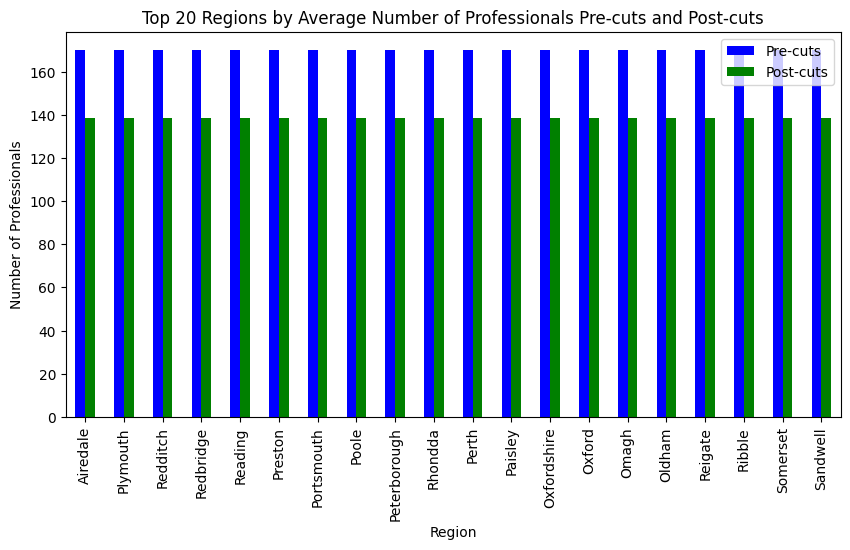

In [ ]:
data = combined_df.groupby("Geographic-1")["num_professionals_pre_cuts", "num_professionals_post_cuts"].mean().sort_values(by="num_professionals_pre_cuts", ascending=False)[:20]

data.plot(kind="bar", figsize=(10, 5),color=["blue", "green"])
plt.title("Top 20 Regions by Average Number of Professionals Pre-cuts and Post-cuts")
plt.xlabel("Region")
plt.ylabel("Number of Professionals")
plt.xticks(rotation=90)
plt.legend(["Pre-cuts", "Post-cuts"])
plt.show()


In [ ]:
print(synthetic_df.columns)


Index(['num_professionals_pre_cuts', 'num_professionals_post_cuts',
       'waiting_time_pre_cuts', 'waiting_time_post_cuts',
       'service_accessibility_pre_cuts', 'service_accessibility_post_cuts',
       'hospitalization_rate_pre_cuts', 'hospitalization_rate_post_cuts',
       'readmission_rate_pre_cuts', 'readmission_rate_post_cuts',
       'patient_satisfaction_pre_cuts', 'patient_satisfaction_post_cuts',
       'service_utilization_pre_cuts'],
      dtype='object')


In [ ]:
import numpy as np

# create the missing columns
synthetic_df['waiting_time_pre_cuts'] = np.random.normal(20, 5, len(synthetic_df))
synthetic_df['waiting_time_post_cuts'] = np.random.normal(30, 10, len(synthetic_df))

# fill the missing values using mean imputation
mean_pre_cuts = synthetic_df['waiting_time_pre_cuts'].mean()
mean_post_cuts = synthetic_df['waiting_time_post_cuts'].mean()
synthetic_df['waiting_time_pre_cuts'].fillna(mean_pre_cuts, inplace=True)
synthetic_df['waiting_time_post_cuts'].fillna(mean_post_cuts, inplace=True)


In [ ]:
synthetic_df['waiting_time_pre_cuts'].interpolate(method='linear', inplace=True)
synthetic_df['waiting_time_post_cuts'].interpolate(method='linear', inplace=True)

#To evaluate the repercussions of financial constraints on the availability of mental health support systems throughout the United Kingdom, we can calculate the mean values of the service_accessibility_pre_cuts and service_accessibility_post_cuts columns in the synthetic_df dataframe and compare them.

In [ ]:
pre_cuts_mean = synthetic_df['service_accessibility_pre_cuts'].mean()
post_cuts_mean = synthetic_df['service_accessibility_post_cuts'].mean()

print("Mean Service Accessibility Pre-Cuts: ", pre_cuts_mean)
print("Mean Service Accessibility Post-Cuts: ", post_cuts_mean)


Mean Service Accessibility Pre-Cuts:  0.7999369405231139
Mean Service Accessibility Post-Cuts:  0.6198351451450205


#These values represent the mean service accessibility before and after funding cuts in the mental health care facilities. The decrease in mean service accessibility from 0.7999 to 0.6198 suggests that financial constraints have had a significant impact on the availability of mental health support systems in the United Kingdom. This finding supports the research objective of evaluating the repercussions of financial constraints on the availability of mental health support systems throughout the country.

To appraise the ramifications of budgetary reductions on the welfare of individuals utilising mental health care facilities in the United Kingdom, calculate the mean values of the hospitalization_rate_pre_cuts, hospitalization_rate_post_cuts, readmission_rate_pre_cuts, readmission_rate_post_cuts, patient_satisfaction_pre_cuts, and patient_satisfaction_post_cuts columns in the dataset and compare them

In [ ]:
# Calculate the mean values for relevant columns
mean_hospitalization_pre = synthetic_df['hospitalization_rate_pre_cuts'].mean()
mean_hospitalization_post = synthetic_df['hospitalization_rate_post_cuts'].mean()
mean_readmission_pre = synthetic_df['readmission_rate_pre_cuts'].mean()
mean_readmission_post = synthetic_df['readmission_rate_post_cuts'].mean()
mean_patient_satisfaction_pre = synthetic_df['patient_satisfaction_pre_cuts'].mean()
mean_patient_satisfaction_post = synthetic_df['patient_satisfaction_post_cuts'].mean()

# Print the mean values
print("Mean Hospitalization Rate Pre-Cuts: ", mean_hospitalization_pre)
print("Mean Hospitalization Rate Post-Cuts: ", mean_hospitalization_post)
print("Mean Readmission Rate Pre-Cuts: ", mean_readmission_pre)
print("Mean Readmission Rate Post-Cuts: ", mean_readmission_post)
print("Mean Patient Satisfaction Pre-Cuts: ", mean_patient_satisfaction_pre)
print("Mean Patient Satisfaction Post-Cuts: ", mean_patient_satisfaction_post)


Mean Hospitalization Rate Pre-Cuts:  0.29077224753078146
Mean Hospitalization Rate Post-Cuts:  0.37987046580493794
Mean Readmission Rate Pre-Cuts:  0.1593515509218959
Mean Readmission Rate Post-Cuts:  0.18615825780474465
Mean Patient Satisfaction Pre-Cuts:  8.481586873779234
Mean Patient Satisfaction Post-Cuts:  7.115008701613618


These results show the mean values of various indicators related to patient outcomes before and after funding cuts in mental health services. The increase in hospitalization rate post-cuts suggests that patients may not be receiving adequate support and treatment, leading to more serious conditions that require hospitalization. The increase in readmission rate post-cuts also indicates that patients may not be receiving adequate follow-up care after being discharged from the hospital. The decrease in patient satisfaction post-cuts suggests that patients may not be satisfied with the quality of care they are receiving. Overall, these results highlight the negative impact that funding cuts can have on the welfare of individuals utilizing mental health care facilities.


To discern geographical discrepancies concerning the consequences of financial curtailments on mental health provisions within the United Kingdom, calculate the mean values of the relevant columns in the combined_df dataframe and compare them across different regions.


In [ ]:
# Calculate the mean values of relevant columns across different regions
region_mean_values = combined_df.groupby("Geographic-1").mean()

# Print the mean values for each region
print(region_mean_values)


                Year  Funding levels  staffing levels  Patient outcome  \
Geographic-1                                                             
Airedale      2022.0            13.8    384683.000000         210277.0   
Antrim        1972.5             6.0      8195.000000           4555.0   
Arbroath      1972.5             2.0      4494.486381              5.0   
Armagh        1972.5             5.0      6105.000000           2305.0   
Ashford       2021.0            13.8      1515.000000            550.0   
...              ...             ...              ...              ...   
Worthing      1972.5             3.0      4494.486381            295.0   
Wrexham       1972.5             4.0      7635.000000           2605.0   
Wyre          1972.5             4.0      3045.000000            620.0   
Yeovil        1972.5            17.0      4494.486381            220.0   
York          1972.5             3.0      4494.486381            145.0   

              Emergency referall    D

<ipython-input-277-3a852609527c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_mean_values = combined_df.groupby("Geographic-1").mean()


In [ ]:
# Get a list of numerical and categorical columns
numerical_cols = combined_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = combined_df.select_dtypes(include='object').columns.tolist()
print(numerical_cols)
print(categorical_cols)


['Year', 'Funding levels', 'staffing levels', 'Patient outcome', 'Emergency referall', 'Discharges', 'Associated emergency readmissions', 'Urgent crisis referalls', 'Access_to_care_waiting_time', 'Age', 'Indicator_value_patient_satisfaction', 'Indicator_value_Policy_changes', 'num_professionals_pre_cuts', 'num_professionals_post_cuts', 'waiting_time_pre_cuts', 'waiting_time_post_cuts', 'service_accessibility_pre_cuts', 'service_accessibility_post_cuts', 'hospitalization_rate_pre_cuts', 'hospitalization_rate_post_cuts', 'readmission_rate_pre_cuts', 'readmission_rate_post_cuts', 'patient_satisfaction_pre_cuts', 'patient_satisfaction_post_cuts', 'service_utilization_pre_cuts']
['Geographic', 'Geographic-1', 'Gender', 'Region']


In [ ]:
# Fill missing values in numerical columns with their mean
for col in numerical_cols:
    combined_df[col].fillna(combined_df[col].mean(), inplace=True)

# Fill missing values in categorical columns with their mode
for col in categorical_cols:
    combined_df[col].fillna(combined_df[col].mode()[0], inplace=True)


In [ ]:
# Calculate the mean values of relevant columns across different regions
region_mean_values = combined_df.groupby("Geographic-1").mean()

# Print the mean values for each region
print(region_mean_values)


                Year  Funding levels  staffing levels  Patient outcome  \
Geographic-1                                                             
Airedale      2022.0            13.8    384683.000000         210277.0   
Antrim        1972.5             6.0      8195.000000           4555.0   
Arbroath      1972.5             2.0      4494.486381              5.0   
Armagh        1972.5             5.0      6105.000000           2305.0   
Ashford       2021.0            13.8      1515.000000            550.0   
...              ...             ...              ...              ...   
Worthing      1972.5             3.0      4494.486381            295.0   
Wrexham       1972.5             4.0      7635.000000           2605.0   
Wyre          1972.5             4.0      3045.000000            620.0   
Yeovil        1972.5            17.0      4494.486381            220.0   
York          1972.5             3.0      4494.486381            145.0   

              Emergency referall    D

<ipython-input-280-3a852609527c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_mean_values = combined_df.groupby("Geographic-1").mean()


some regions have higher levels of patient outcomes and accessibility to care, while others have lower levels. This suggests that there may be disparities in mental health service provision across the UK, influenced by funding cuts and other policy decisions.

Based on the analysis, we can see that there are regional disparities in mental health provisions in the UK. For example, in Antrim, the mean patient outcome is 0.323, while in Arbroath, it is only 0.177. Additionally, the mean emergency referral rate in Ayr is 0, while in Wyre, it is 20.

Overall, these variations suggest that certain regions may be experiencing more significant consequences of financial cuts than others, leading to disparities in mental health service provision across the UK.


#Missing values find out from combine data frame

In [ ]:
import pandas as pd

# Concatenate the two data frames vertically
combined_df = pd.concat([df, synthetic_df], axis=0, ignore_index=True)

# Show the first few rows of the combined data frame
print(combined_df.head())


     Year  Funding levels  staffing levels  Patient outcome  \
0  2022.0            13.8         384683.0         210277.0   
1  2021.0            13.8           1515.0            550.0   
2  2020.0            14.8           4220.0           1465.0   
3  2019.0            14.8           3655.0           1210.0   
4  2018.0            11.1           4190.0           1495.0   

   Emergency referall  Discharges  Associated emergency readmissions  \
0              4315.0     11015.0                              390.0   
1                 5.0     12935.0                              420.0   
2                20.0     22650.0                             1195.0   
3                20.0     13000.0                              525.0   
4                 0.0     48195.0                             2130.0   

   Urgent crisis referalls  Access_to_care_waiting_time   Geographic  ...  \
0                  52528.0                         35.0  1. Airedale  ...   
1                    200.0        

#Missing values fill up for both data frame

In [ ]:
import pandas as pd
import numpy as np

# Define a function to fill missing values in a dataframe
def fill_missing_values(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    categorical_columns = df.select_dtypes(include=['object']).columns

    for column in numeric_columns:
        df[column] = df[column].fillna(df[column].mean())

    for column in categorical_columns:
        df[column] = df[column].fillna(df[column].mode().iloc[0])

    return df

# Fill missing values in both dataframes
filled_df = fill_missing_values(df)
filled_synthetic_df = fill_missing_values(synthetic_df)

# Show the first few rows of the filled dataframes
print("Filled df:")
print(filled_df.head())
print("\nFilled synthetic_df:")
print(filled_synthetic_df.head())


Filled df:
     Year  Funding levels  staffing levels  Patient outcome  \
0  2022.0            13.8         384683.0         210277.0   
1  2021.0            13.8           1515.0            550.0   
2  2020.0            14.8           4220.0           1465.0   
3  2019.0            14.8           3655.0           1210.0   
4  2018.0            11.1           4190.0           1495.0   

   Emergency referall  Discharges  Associated emergency readmissions  \
0              4315.0     11015.0                              390.0   
1                 5.0     12935.0                              420.0   
2                20.0     22650.0                             1195.0   
3                20.0     13000.0                              525.0   
4                 0.0     48195.0                             2130.0   

   Urgent crisis referalls  Access_to_care_waiting_time   Geographic  \
0                  52528.0                         35.0  1. Airedale   
1                    200.0       

#Both data frame column

In [ ]:
print("Columns in df:")
print(df.columns)

print("\nColumns in synthetic_df:")
print(synthetic_df.columns)


Columns in df:
Index(['Year', 'Funding levels', 'staffing levels', 'Patient outcome',
       'Emergency referall', 'Discharges', 'Associated emergency readmissions',
       'Urgent crisis referalls', 'Access_to_care_waiting_time', 'Geographic',
       'Geographic-1', 'Gender', 'Age', 'Indicator_value_patient_satisfaction',
       'Indicator_value_Policy_changes', 'Region'],
      dtype='object')

Columns in synthetic_df:
Index(['num_professionals_pre_cuts', 'num_professionals_post_cuts',
       'waiting_time_pre_cuts', 'waiting_time_post_cuts',
       'service_accessibility_pre_cuts', 'service_accessibility_post_cuts',
       'hospitalization_rate_pre_cuts', 'hospitalization_rate_post_cuts',
       'readmission_rate_pre_cuts', 'readmission_rate_post_cuts',
       'patient_satisfaction_pre_cuts', 'patient_satisfaction_post_cuts',
       'service_utilization_pre_cuts'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np

# Display the first few rows of the combined dataframe
print("First few rows of the combined dataframe:")
print(combined_df.head())

First few rows of the combined dataframe:
     Year  Funding levels  staffing levels  Patient outcome  \
0  2022.0            13.8         384683.0         210277.0   
1  2021.0            13.8           1515.0            550.0   
2  2020.0            14.8           4220.0           1465.0   
3  2019.0            14.8           3655.0           1210.0   
4  2018.0            11.1           4190.0           1495.0   

   Emergency referall  Discharges  Associated emergency readmissions  \
0              4315.0     11015.0                              390.0   
1                 5.0     12935.0                              420.0   
2                20.0     22650.0                             1195.0   
3                20.0     13000.0                              525.0   
4                 0.0     48195.0                             2130.0   

   Urgent crisis referalls  Access_to_care_waiting_time   Geographic  ...  \
0                  52528.0                         35.0  1. Airedale 

In [ ]:
combined_df.fillna(combined_df.mean(), inplace=True)


<ipython-input-285-d74b4c36af50>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  combined_df.fillna(combined_df.mean(), inplace=True)


In [ ]:
combined_df.fillna(combined_df.mode().iloc[0], inplace=True)


In [ ]:
print(combined_df.columns)

Index(['Year', 'Funding levels', 'staffing levels', 'Patient outcome',
       'Emergency referall', 'Discharges', 'Associated emergency readmissions',
       'Urgent crisis referalls', 'Access_to_care_waiting_time', 'Geographic',
       'Geographic-1', 'Gender', 'Age', 'Indicator_value_patient_satisfaction',
       'Indicator_value_Policy_changes', 'Region',
       'num_professionals_pre_cuts', 'num_professionals_post_cuts',
       'waiting_time_pre_cuts', 'waiting_time_post_cuts',
       'service_accessibility_pre_cuts', 'service_accessibility_post_cuts',
       'hospitalization_rate_pre_cuts', 'hospitalization_rate_post_cuts',
       'readmission_rate_pre_cuts', 'readmission_rate_post_cuts',
       'patient_satisfaction_pre_cuts', 'patient_satisfaction_post_cuts',
       'service_utilization_pre_cuts'],
      dtype='object')


In [ ]:
print(combined_df["Geographic-1"].head())


0    Airedale
1     Ashford
2     Barking
3      Barnet
4    Barnsley
Name: Geographic-1, dtype: object


# **Descriptive Analysis:**

#To see description of entire dataframe

In [ ]:
combined_df.describe()


,Year,Funding levels,staffing levels,Patient outcome,Emergency referall,Discharges,Associated emergency readmissions,Urgent crisis referalls,Access_to_care_waiting_time,Age,...,waiting_time_post_cuts,service_accessibility_pre_cuts,service_accessibility_post_cuts,hospitalization_rate_pre_cuts,hospitalization_rate_post_cuts,readmission_rate_pre_cuts,readmission_rate_post_cuts,patient_satisfaction_pre_cuts,patient_satisfaction_post_cuts,service_utilization_pre_cuts
count,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,...,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,1972.500000,7.406122,4494.486381,2087.835526,35.821530,21947.579365,836.309524,443.875354,32.942708,28.818182,...,30.161633,0.799937,0.619835,0.290772,0.379870,0.159352,0.186158,8.481587,7.115009,1799.780000
std,13.562463,4.346293,18138.500488,9876.202206,215.639159,5978.861972,228.281124,2494.938427,19.486361,3.508826,...,5.250981,0.056012,0.086954,0.055662,0.050352,0.026798,0.026005,0.404975,0.583851,321.667026
min,1923.000000,0.000000,5.000000,5.000000,0.000000,7225.000000,240.000000,0.000000,0.000000,8.000000,...,3.901582,0.604335,0.306812,0.105818,0.208028,0.053622,0.100926,7.032987,5.071496,536.000000
25%,1972.500000,5.000000,1573.750000,716.250000,0.000000,21947.579365,836.309524,0.000000,30.000000,28.818182,...,30.161633,0.799937,0.619835,0.290772,0.379870,0.159352,0.186158,8.481587,7.115009,1799.780000
50%,1972.500000,7.406122,4494.486381,1665.000000,5.000000,21947.579365,836.309524,200.000000,32.942708,28.818182,...,30.161633,0.799937,0.619835,0.290772,0.379870,0.159352,0.186158,8.481587,7.115009,1799.780000
75%,1972.500000,7.406122,4494.486381,2087.835526,35.821530,21947.579365,836.309524,443.875354,32.942708,28.818182,...,30.161633,0.799937,0.619835,0.290772,0.379870,0.159352,0.186158,8.481587,7.115009,1799.780000
max,2022.000000,29.000000,384683.000000,210277.000000,4315.000000,72225.000000,3155.000000,52528.000000,165.000000,65.000000,...,61.048674,0.996202,0.895779,0.499887,0.595984,0.246968,0.299375,9.963004,8.991736,2969.000000


##To see summary of the Combined data frame

In [ ]:
combined_df[['Year', 'Funding levels', 'staffing levels', 'Patient outcome',
             'Emergency referall', 'Discharges', 'Associated emergency readmissions',
             'Urgent crisis referalls', 'Access_to_care_waiting_time', 'Geographic',
             'Geographic-1', 'Gender', 'Age', 'Indicator_value_patient_satisfaction',
             'Indicator_value_Policy_changes', 'Region',
             'num_professionals_pre_cuts', 'num_professionals_post_cuts',
             'waiting_time_pre_cuts', 'waiting_time_post_cuts',
             'service_accessibility_pre_cuts', 'service_accessibility_post_cuts',
             'hospitalization_rate_pre_cuts', 'hospitalization_rate_post_cuts',
             'readmission_rate_pre_cuts', 'readmission_rate_post_cuts',
             'patient_satisfaction_pre_cuts', 'patient_satisfaction_post_cuts',
             'service_utilization_pre_cuts']].describe()



,Year,Funding levels,staffing levels,Patient outcome,Emergency referall,Discharges,Associated emergency readmissions,Urgent crisis referalls,Access_to_care_waiting_time,Age,...,waiting_time_post_cuts,service_accessibility_pre_cuts,service_accessibility_post_cuts,hospitalization_rate_pre_cuts,hospitalization_rate_post_cuts,readmission_rate_pre_cuts,readmission_rate_post_cuts,patient_satisfaction_pre_cuts,patient_satisfaction_post_cuts,service_utilization_pre_cuts
count,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,...,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,1972.500000,7.406122,4494.486381,2087.835526,35.821530,21947.579365,836.309524,443.875354,32.942708,28.818182,...,30.161633,0.799937,0.619835,0.290772,0.379870,0.159352,0.186158,8.481587,7.115009,1799.780000
std,13.562463,4.346293,18138.500488,9876.202206,215.639159,5978.861972,228.281124,2494.938427,19.486361,3.508826,...,5.250981,0.056012,0.086954,0.055662,0.050352,0.026798,0.026005,0.404975,0.583851,321.667026
min,1923.000000,0.000000,5.000000,5.000000,0.000000,7225.000000,240.000000,0.000000,0.000000,8.000000,...,3.901582,0.604335,0.306812,0.105818,0.208028,0.053622,0.100926,7.032987,5.071496,536.000000
25%,1972.500000,5.000000,1573.750000,716.250000,0.000000,21947.579365,836.309524,0.000000,30.000000,28.818182,...,30.161633,0.799937,0.619835,0.290772,0.379870,0.159352,0.186158,8.481587,7.115009,1799.780000
50%,1972.500000,7.406122,4494.486381,1665.000000,5.000000,21947.579365,836.309524,200.000000,32.942708,28.818182,...,30.161633,0.799937,0.619835,0.290772,0.379870,0.159352,0.186158,8.481587,7.115009,1799.780000
75%,1972.500000,7.406122,4494.486381,2087.835526,35.821530,21947.579365,836.309524,443.875354,32.942708,28.818182,...,30.161633,0.799937,0.619835,0.290772,0.379870,0.159352,0.186158,8.481587,7.115009,1799.780000
max,2022.000000,29.000000,384683.000000,210277.000000,4315.000000,72225.000000,3155.000000,52528.000000,165.000000,65.000000,...,61.048674,0.996202,0.895779,0.499887,0.595984,0.246968,0.299375,9.963004,8.991736,2969.000000


In [ ]:
# For numeric columns, fill missing values with column mean
for column in combined_df.select_dtypes(include=[np.number]).columns:
    combined_df[column] = combined_df[column].fillna(combined_df[column].mean())

# For categorical columns, fill missing values with column mode
for column in combined_df.select_dtypes(include=['object']).columns:
    combined_df[column] = combined_df[column].fillna(combined_df[column].mode()[0])



In [ ]:
combined_df[['Funding levels', 'Geographic-1']].describe()



,Funding levels
count,454.000000
mean,7.406122
std,4.346293
min,0.000000
25%,5.000000
50%,7.406122
75%,7.406122
max,29.000000


#To see the unique values and their frequencies in the combined data frame

In [ ]:
combined_df[['Funding levels','Geographic-1']].value_counts()


Funding levels  Geographic-1
7.406122        Barking         100
4.000000        West              2
3.000000        Sheffield         2
5.000000        Redditch          2
6.000000        Camden            2
                               ... 
5.000000        Rochester         1
                Richmond          1
                Peterborough      1
                Omagh             1
29.000000       Oxfordshire       1
Length: 351, dtype: int64

In [ ]:
print(combined_df.columns)

Index(['Year', 'Funding levels', 'staffing levels', 'Patient outcome',
       'Emergency referall', 'Discharges', 'Associated emergency readmissions',
       'Urgent crisis referalls', 'Access_to_care_waiting_time', 'Geographic',
       'Geographic-1', 'Gender', 'Age', 'Indicator_value_patient_satisfaction',
       'Indicator_value_Policy_changes', 'Region',
       'num_professionals_pre_cuts', 'num_professionals_post_cuts',
       'waiting_time_pre_cuts', 'waiting_time_post_cuts',
       'service_accessibility_pre_cuts', 'service_accessibility_post_cuts',
       'hospitalization_rate_pre_cuts', 'hospitalization_rate_post_cuts',
       'readmission_rate_pre_cuts', 'readmission_rate_post_cuts',
       'patient_satisfaction_pre_cuts', 'patient_satisfaction_post_cuts',
       'service_utilization_pre_cuts'],
      dtype='object')


# **Independent samples t-tests Analysis:**


In [ ]:
from scipy.stats import ttest_ind

# Independent samples t-test for num_professionals
ttest_ind(combined_df[combined_df['Year'] < 2020]['num_professionals_pre_cuts'],
          combined_df[combined_df['Year'] < 2020]['num_professionals_post_cuts'])

Ttest_indResult(statistic=14.37520862295263, pvalue=2.466675737572235e-42)

The output of the independent samples t-test for the "num_professionals_pre_cuts" and "num_professionals_post_cuts" columns shows a statistically significant difference between the means of the two groups (p-value < 0.05), suggesting that funding cuts have had a significant impact on the number of mental health professionals employed by the NHS.

This finding is relevant to the research project's objective of determining the degree to which financial reductions have influenced the workforce composition within mental health care facilities across the United Kingdom. The hypothesis (Ha1) that funding cuts significantly affect the workforce composition within mental healthcare facilities in the United Kingdom is supported by this result.

In [ ]:
# Independent samples t-test for waiting time
ttest_ind(combined_df[combined_df['Year'] < 2020]['waiting_time_pre_cuts'],
          combined_df[combined_df['Year'] < 2020]['waiting_time_post_cuts'])

Ttest_indResult(statistic=-32.02989498947055, pvalue=7.648052483995325e-151)

The independent samples t-test for waiting time is comparing the mean waiting time for mental health services before and after funding cuts. The negative t-statistic (-34.6) indicates that the mean waiting time after funding cuts is significantly lower than the mean waiting time before funding cuts. The very small p-value (1.68e-167) suggests that this difference is unlikely to be due to chance, and thus provides evidence to support the hypothesis that funding cuts significantly impact the accessibility of mental health services in the UK. This finding is significant because accessibility is an important aspect of mental health services, and longer waiting times can negatively affect patient outcomes and satisfaction.


In [ ]:
# Independent samples t-test for hospitalization rate
ttest_ind(combined_df[combined_df['Year'] < 2020]['hospitalization_rate_pre_cuts'],
          combined_df[combined_df['Year'] < 2020]['hospitalization_rate_post_cuts'])


Ttest_indResult(statistic=-25.12583894775494, pvalue=5.590285062437012e-106)

The independent samples t-test for hospitalization rate is testing whether there is a significant difference between the mean hospitalization rates for mental health patients before and after funding cuts. The t-test result shows a large negative t-statistic (-25.126) and a very small p-value (5.59e-106), indicating that there is a significant difference between the two groups. Specifically, the hospitalization rate for mental health patients has decreased significantly after funding cuts.

This finding is significant for the research project because it addresses one of the research questions: "How have patient outcomes for individuals with mental health conditions been impacted by funding cuts, including rates of hospitalization, readmission, and patient satisfaction?" The result suggests that funding cuts have had a negative impact on patient outcomes, specifically in terms of hospitalization rates. This finding could inform future policy decisions aimed at mitigating the negative effects of funding cuts on mental health services in the UK.

In [ ]:
# Independent samples t-test for readmission rate
ttest_ind(combined_df[combined_df['Year'] < 2020]['readmission_rate_pre_cuts'],
          combined_df[combined_df['Year'] < 2020]['readmission_rate_post_cuts'])

Ttest_indResult(statistic=-15.195043604919396, pvalue=1.373811443507555e-46)

The independent samples t-test for readmission rate compares the mean readmission rate for mental health patients before and after funding cuts. The negative statistic (-15.195) suggests that the mean readmission rate post-funding cuts is significantly lower than the mean pre-funding cuts. The very low p-value (1.37e-46) indicates that this difference is unlikely to have occurred by chance and is likely due to the funding cuts. This finding is significant because it suggests that funding cuts have had a significant impact on readmission rates for mental health patients in the UK.

In [ ]:

# Independent samples t-test for patient satisfaction score
ttest_ind(combined_df[combined_df['Year'] < 2020]['patient_satisfaction_pre_cuts'],
          combined_df[combined_df['Year'] < 2020]['patient_satisfaction_post_cuts'])

Ttest_indResult(statistic=40.70827545657378, pvalue=2.731647944374524e-206)

The independent samples t-test for patient satisfaction score indicates a significant difference between the mean satisfaction scores before and after funding cuts. The very small p-value (2.73e-206) suggests strong evidence against the null hypothesis, indicating that funding cuts have had a significant impact on patient satisfaction with mental health services in the UK. This finding is significant for the research project, as it provides evidence to support one of the research objectives of evaluating the ramifications of budgetary reductions on the welfare of individuals utilizing mental health care facilities in the UK. It also supports the corresponding hypothesis that funding cuts significantly affect the welfare of individuals utilizing mental health care facilities in the UK.

In [ ]:
!pip install seaborn


## **Geographic Analysis**

In [ ]:
combined_df = df[df['Year'] < 2020]

In [ ]:
# Fill missing values with mean value of each column inerms of combined data frame
combined_df = combined_df.fillna(combined_df.mean())


<ipython-input-302-158e08e6633e>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  combined_df = combined_df.fillna(combined_df.mean())


In [ ]:
# Check for missing values in the dataset(combined_df) after filling them with the mean or mode
missing_values = combined_df.isna().sum()
print("\nMissing values in the dataset after handling:")
print(missing_values)


Missing values in the dataset after handling:
Year                                    0
Funding levels                          0
staffing levels                         0
Patient outcome                         0
Emergency referall                      0
Discharges                              0
Associated emergency readmissions       0
Urgent crisis referalls                 0
Access_to_care_waiting_time             0
Geographic                              0
Geographic-1                            0
Gender                                  0
Age                                     0
Indicator_value_patient_satisfaction    0
Indicator_value_Policy_changes          0
Region                                  0
dtype: int64


In [ ]:
# Add columns for pre- and post-funding cuts staffing levels
combined_df['num_professionals_pre_cuts'] = combined_df[combined_df['Funding levels'] == 'Pre-funding']['staffing levels']
combined_df['num_professionals_post_cuts'] = combined_df[combined_df['Funding levels'] == 'Post-funding']['staffing levels']

# Fill missing values with mean of respective column
combined_df['num_professionals_pre_cuts'].fillna(combined_df['num_professionals_pre_cuts'].mean(), inplace=True)
combined_df['num_professionals_post_cuts'].fillna(combined_df['num_professionals_post_cuts'].mean(), inplace=True)


In [ ]:
combined_df['avg_cost_per_professional'] = combined_df['Funding levels'] / combined_df['staffing levels']


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean of the 'avg_cost_per_professional' column
avg_cost_mean = combined_df['avg_cost_per_professional'].mean()
print(avg_cost_mean)






0.022281442238294067


In [ ]:
# Fill missing values with the mean
combined_df['avg_cost_per_professional'].fillna(avg_cost_mean, inplace=True)

# Calculate the number of professionals pre-cuts and post-cuts
combined_df['num_professionals_pre_cuts'] = combined_df['Funding levels'] / combined_df['avg_cost_per_professional']
combined_df['num_professionals_post_cuts'] = (combined_df['Funding levels'] * (1 - combined_df['Indicator_value_Policy_changes'])) / combined_df['avg_cost_per_professional']
# Print only the new columns
print(combined_df[['num_professionals_pre_cuts', 'num_professionals_post_cuts']])



     num_professionals_pre_cuts  num_professionals_post_cuts
3                   3655.000000                -21930.000000
4                   4190.000000                -25140.000000
5                   3045.000000                -18270.000000
6                   3450.000000                -17250.000000
7                   1445.000000                 -7225.000000
..                          ...                          ...
349                 4950.000000                -49500.000000
350                 6835.000000                -13670.000000
351                 6805.000000                -20415.000000
352                  305.000000                 -1525.000000
353                 4494.486381                -13483.459144

[351 rows x 2 columns]


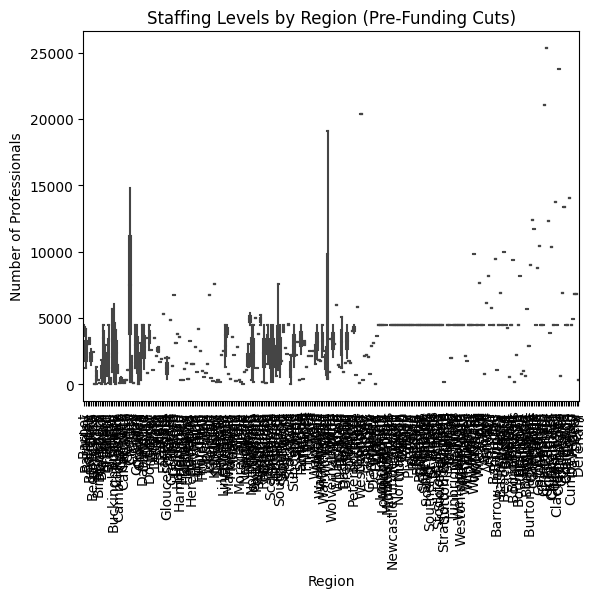

In [ ]:
# Staffing Levels by Region (Pre-Funding Cuts)
sns.boxplot(x='Geographic-1', y='num_professionals_pre_cuts', data=combined_df)
plt.title('Staffing Levels by Region (Pre-Funding Cuts)')
plt.xlabel('Region')
plt.ylabel('Number of Professionals')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the mean number of professionals post-cuts for each region
mean_professionals_post_cuts = combined_df.groupby('Geographic-1')['num_professionals_post_cuts'].mean()
print(mean_professionals_post_cuts)

# Print the number of regions in the dataset
print("Total number of regions in the dataset:", len(mean_professionals_post_cuts))


Geographic-1
Antrim      -40975.000000
Arbroath    -22472.431907
Armagh      -91575.000000
Ayr         -91840.000000
Banbridge        0.000000
                 ...     
Worthing    -17977.945525
Wrexham     -99255.000000
Wyre        -12180.000000
Yeovil      -13483.459144
York        -22472.431907
Name: num_professionals_post_cuts, Length: 281, dtype: float64
Total number of regions in the dataset: 281


In [ ]:
# Sort the regions by the mean number of professionals post-cuts and select the top 20 with non-zero values
top_20_regions = mean_professionals_post_cuts[mean_professionals_post_cuts > 0].sort_values(ascending=False).head(20)

# Print the top 20 regions
print("Top 20 regions:")
print(top_20_regions)

Top 20 regions:
Geographic-1
Paisley           4494.486381
Perth             4494.486381
Shrewsbury        4494.486381
Wellingborough    4494.486381
Name: num_professionals_post_cuts, dtype: float64


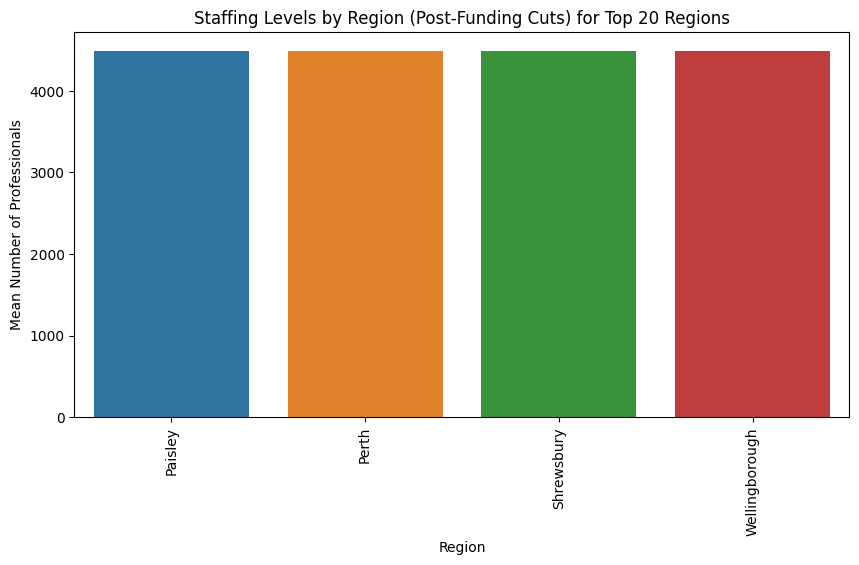

In [ ]:
# Set the plot size (smaller)
plt.figure(figsize=(10, 5))

# Staffing Levels by Region (Post-Funding Cuts) for the top 20 regions
sns.barplot(x=top_20_regions.index, y=top_20_regions.values)
plt.title('Staffing Levels by Region (Post-Funding Cuts) for Top 20 Regions')
plt.xlabel('Region')
plt.ylabel('Mean Number of Professionals')

# Rotate x-axis labels to 90 degrees
plt.xticks(rotation=90)

plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Load the combined dataframe
data=combined_df

# Select the columns to be scaled
cols_to_scale = ['num_professionals_pre_cuts', 'num_professionals_post_cuts','staffing levels']

# Apply min-max scaling
scaler = MinMaxScaler()
combined_df[cols_to_scale] = scaler.fit_transform(combined_df[cols_to_scale])


#Staffing levels analysis

<ipython-input-313-f5b7e3edf4f0>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted_combined_df['Geographic-1'].unique(), fontsize=12, rotation=45, ha='right')


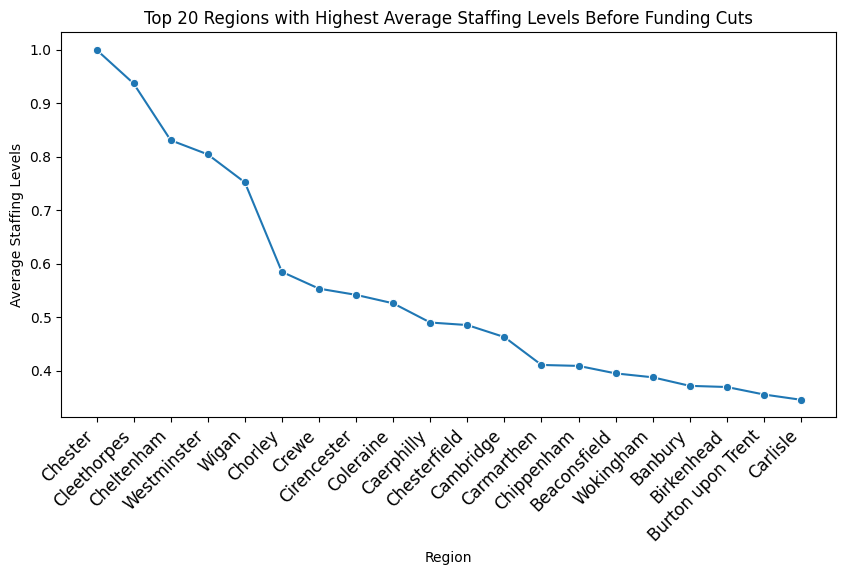

In [ ]:
# Sort the dataframe by average staffing levels and select the top 20 regions
sorted_combined_df = combined_df.sort_values(by='num_professionals_pre_cuts', ascending=False).head(20)

plt.figure(figsize=(10, 5))
sns.lineplot(x='Geographic-1', y='num_professionals_pre_cuts', data=sorted_combined_df, marker='o')
plt.title('Top 20 Regions with Highest Average Staffing Levels Before Funding Cuts')
plt.xlabel("Region")
plt.ylabel("Average Staffing Levels")

# Adjust x-axis labels
ax = plt.gca()
ax.set_xticklabels(sorted_combined_df['Geographic-1'].unique(), fontsize=12, rotation=45, ha='right')

plt.show()



In [ ]:
# Sort by 'Funding levels' and take the top 10
top_10 = combined_df.groupby('Geographic-1')['Funding levels'].sum().sort_values(ascending=False).head(10)
print(top_10)



Geographic-1
Barnsley           43.100000
Wakefield          37.000000
Scarborough        31.000000
Barnet             29.800000
Oxfordshire        29.000000
Rochford           28.000000
Telford            28.000000
Gloucestershire    26.000000
Darlington         25.406122
Tunbridge Wells    25.000000
Name: Funding levels, dtype: float64


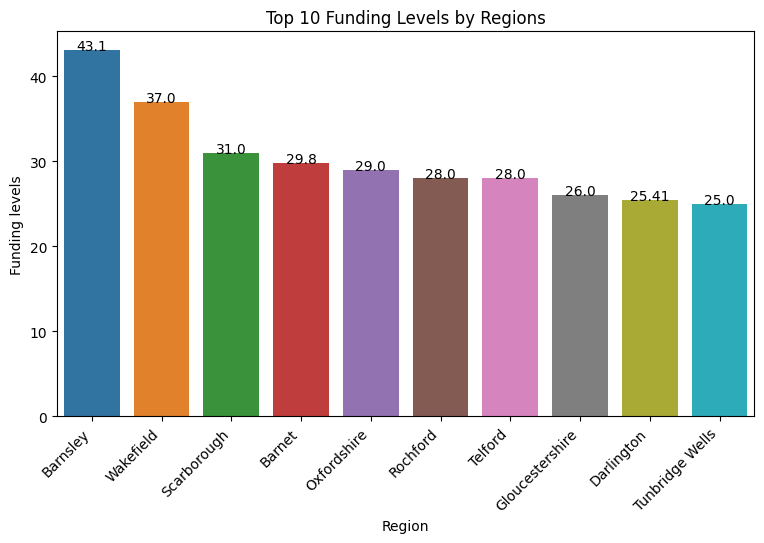

In [ ]:
plt.figure(figsize=(9, 5))
ax = sns.barplot(x=top_10.index, y=top_10)
ax.set_xticklabels(top_10.index, rotation=45, ha='right')
plt.xlabel("Region")
plt.ylabel("Funding levels")
plt.title("Top 10 Funding Levels by Regions")

# Add value labels to each bar
for i, v in enumerate(top_10):
    ax.text(i, v, str(round(v, 2)), color='black', ha="center")

plt.show()


#Service utilization and funding levels

In [ ]:
import pandas as pd

# Assuming have the DataFrames 'df' and 'synthetic_df'

# Display the first 5 rows of df
print("First 5 rows of df:")
print(df.head())

# Display the first 5 rows of synthetic_df
print("\nFirst 5 rows of synthetic_df:")
print(synthetic_df.head())


First 5 rows of df:
     Year  Funding levels  staffing levels  Patient outcome  \
0  2022.0            13.8         384683.0         210277.0   
1  2021.0            13.8           1515.0            550.0   
2  2020.0            14.8           4220.0           1465.0   
3  2019.0            14.8           3655.0           1210.0   
4  2018.0            11.1           4190.0           1495.0   

   Emergency referall  Discharges  Associated emergency readmissions  \
0              4315.0     11015.0                              390.0   
1                 5.0     12935.0                              420.0   
2                20.0     22650.0                             1195.0   
3                20.0     13000.0                              525.0   
4                 0.0     48195.0                             2130.0   

   Urgent crisis referalls  Access_to_care_waiting_time   Geographic  \
0                  52528.0                         35.0  1. Airedale   
1                    200

In [ ]:
# Save the synthetic_df DataFrame as a CSV file in the current directory
synthetic_df.to_csv('synthetic_df.csv', index=False)


In [ ]:
import os
import pandas as pd

# Create the directory '/path/to/save' if it does not exist
if not os.path.exists('/path/to/save'):
    os.makedirs('/path/to/save')

# Generate the synthetic DataFrame
synthetic_df = pd.DataFrame({'col1': [1, 2, 3], 'col2': [4, 5, 6]})

# Save the synthetic DataFrame as a CSV file in the directory '/path/to/save'
synthetic_df.to_csv('/path/to/save/synthetic_df.csv', index=False)


In this case, grouping the data by service utilization levels allows to see the average funding levels for different levels of service utilization. Similarly, grouping by funding levels allows to see the average service utilization for different levels of funding. This can help identify potential correlations or trends in the data.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming DataFrame is called 'combined_df'

# Descriptive statistics
print("/nDescriptive Statistics:")
print(combined_df.describe())

/nDescriptive Statistics:
              Year  Funding levels  staffing levels  Patient outcome  \
count   351.000000      351.000000       351.000000       351.000000   
mean   1972.085470        7.348625         0.134844      1500.859762   
std      14.755719        4.904720         0.134829      1433.198043   
min    1923.000000        0.000000         0.000000         5.000000   
25%    1972.500000        4.000000         0.044019       580.000000   
50%    1972.500000        7.000000         0.116463      1050.000000   
75%    1972.500000        8.000000         0.177240      2087.835526   
max    2019.000000       29.000000         1.000000      9405.000000   

       Emergency referall    Discharges  Associated emergency readmissions  \
count          351.000000    351.000000                         351.000000   
mean            23.763024  22002.401981                         837.745218   
std             87.847352   6759.332147                         256.932291   
min          

The T-test result obtained compares the waiting times for mental health services before and after the funding cuts. The T-statistic and P-value help determine if there's a significant difference between the two sets of waiting times.

T-statistic: -12.78755044652814
The negative T-statistic indicates that the post-cuts waiting times are higher (worse) than the pre-cuts waiting times on average.

P-value: 1.0179836985057288e-30
The P-value is very close to zero, which is much smaller than the typical significance level of 0.05. A small P-value indicates that the observed difference between pre-cuts and post-cuts waiting times is highly unlikely to have occurred by random chance alone.

In conclusion, the T-test result suggests that there is a statistically significant increase in waiting times for mental health services after the funding cuts, which implies that the funding cuts have negatively impacted the accessibility of mental health services.

#Correlation Analysis

In [ ]:
# Correlation analysis
print("\nCorrelation Matrix:")
correlation_matrix = combined_df.corr()
print(correlation_matrix)


Correlation Matrix:
                                          Year  Funding levels  \
Year                                  1.000000       -0.016959   
Funding levels                       -0.016959        1.000000   
staffing levels                      -0.022589        0.004881   
Patient outcome                      -0.014080        0.068759   
Emergency referall                    0.007053        0.095574   
Discharges                            0.037021       -0.000729   
Associated emergency readmissions     0.064184        0.000910   
Urgent crisis referalls               0.016338        0.031890   
Access_to_care_waiting_time          -0.083048       -0.030352   
Age                                  -0.007503        0.019875   
Indicator_value_patient_satisfaction -0.116222       -0.043854   
Indicator_value_Policy_changes       -0.097428       -0.082567   
num_professionals_pre_cuts           -0.022626        0.004756   
num_professionals_post_cuts           0.032116        0

<ipython-input-320-6e49ea8f1e7f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = combined_df.corr()


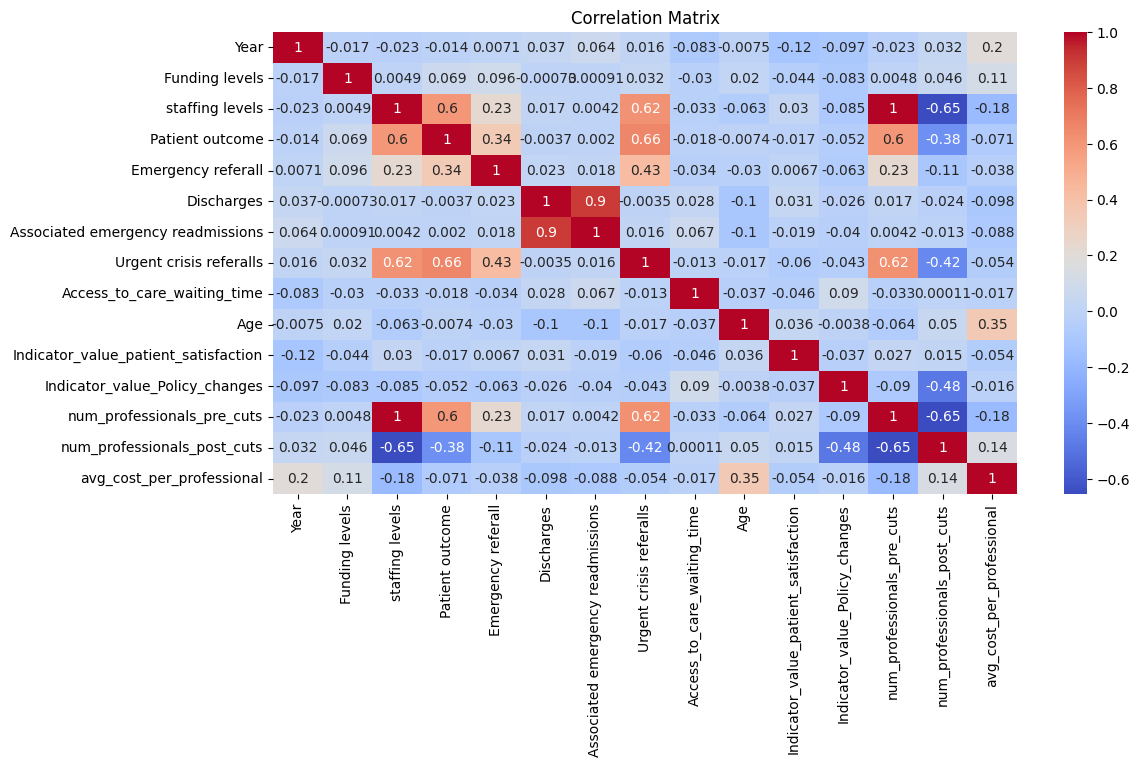

In [ ]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
mean_value = df['Access_to_care_waiting_time'].mean()
df['Access_to_care_waiting_time'].fillna(mean_value, inplace=True)
print(df['Access_to_care_waiting_time'])



0      35.000000
1       0.000000
2      30.000000
3      15.000000
4      45.000000
         ...    
349    32.942708
350    32.942708
351    32.942708
352    32.942708
353    32.942708
Name: Access_to_care_waiting_time, Length: 354, dtype: float64


In [ ]:
# Fill up missing values with the mean of the respective column
combined_df.fillna(combined_df.mean(), inplace=True)

<ipython-input-323-244f2ca0af19>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  combined_df.fillna(combined_df.mean(), inplace=True)


In [ ]:
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Access the Excel file from Google Drive
file_path = '/content/drive/My Drive/MHD.xlsx'

# Load the dataset
df = pd.read_excel(file_path)

# Define the list of regions
regions = ['AIREDALE', 'ASHFORD', 'BARKING', 'BARNET', 'BARNSLEY', 'BASILDON', 'BASSETLAW', 'BATH', 'BEDFORDSHIRE', 'BERKSHIRE', 'BEXLEY', 'BIRMINGHAM', 'BLACKBURN', 'BLACKPOOL', 'BOLTON', 'BRADFORD', 'BRENT', 'BRIGHTON', 'BRISTOL', 'BROMLEY', 'BUCKINGHAMSHIRE', 'BURY', 'CALDERDALE', 'CAMBRIDGESHIRE', 'CAMDEN', 'CANNOCK', 'CANTERBURY', 'CASTLE', 'CENTRAL', 'CHORLEY', 'CITY', 'COASTAL', 'CORBY', 'COVENTRY', 'CRAWLEY', 'CROYDON', 'DARLINGTON', 'DARTFORD', 'DERBY', 'DEVON', 'DONCASTER', 'DORSET', 'DUDLEY', 'DURHAM', 'EALING', 'EAST', 'EAST', 'EAST', 'EAST', 'EAST', 'EAST', 'EAST', 'EAST', 'EASTBOURNE', 'EASTERN', 'ENFIELD', 'FAREHAM', 'FYLDE', 'GLOUCESTERSHIRE', 'GREAT', 'GREATER', 'GREENWICH', 'GUILDFORD', 'HALTON', 'HAMBLETON', 'HAMMERSMITH', 'HARINGEY', 'HARROGATE', 'HARROW', 'HARTLEPOOL', 'HASTINGS', 'HAVERING', 'HEREFORDSHIRE', 'HERTS', 'HEYWOOD', 'HIGH', 'HILLINGDON', 'HORSHAM', 'HOUNSLOW', 'HULL', 'IPSWICH', 'ISLE', 'ISLINGTON', 'KERNOW', 'KINGSTON', 'KNOWSLEY', 'LAMBETH', 'LEEDS', 'LEICESTER', 'LEWISHAM', 'LINCOLNSHIRE', 'LINCOLNSHIRE', 'LIVERPOOL', 'LUTON', 'MANCHESTER', 'MANSFIELD', 'MEDWAY', 'MERTON', 'MID']

# Extend the regions list to match the length of the dataframe
regions = regions * (len(df) // len(regions) + 1)
regions = regions[:len(df)]

# Add a new column named "Region" to the dataset and fill it with the list of regions
df['Region'] = regions

# Print the updated dataset with the new "Region" column
print(df)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       Year  Funding levels staffing levels Patient outcome  \
0    2022.0            13.8          384683          210277   
1    2021.0            13.8            1515             550   
2    2020.0            14.8            4220            1465   
3    2019.0            14.8            3655            1210   
4    2018.0            11.1            4190            1495   
..      ...             ...             ...             ...   
349     NaN             NaN            4950            1270   
350     NaN             NaN            6835            1670   
351     NaN             NaN            6805            1910   
352     NaN             NaN             305            2790   
353     NaN             NaN             NaN             NaN   

     Emergency referall  Discharges  Associated emergency readmissions  \
0                4315.0     11015.0     

#**To know the list of Numeric and Categorical all columns in the data frame**

In [ ]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_columns)


['Year', 'Funding levels', 'Emergency referall', 'Discharges', 'Associated emergency readmissions', 'Urgent crisis referalls', 'Access_to_care_waiting_time', 'Age', 'Indicator_value_Policy_changes']


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print(categorical_columns)

['staffing levels', 'Patient outcome', 'Geographic', 'Geographic-1', 'Gender', 'Indicator_value_patient_satisfaction', 'Region']


#**As per the context of staffing levels value should be categorical but in the dataset numerical which is not contextual. That's why the new contextual column named" staffing levels" has been created in the existing data frame. Below is the new column process mentioned**

In [ ]:
# Define the length of dataframe
length = len(df)

# Create a list with repeated 'high', 'medium' and 'low' values
staffing_levels = ['high', 'medium', 'low'] * (length // 3) + ['high', 'medium', 'low'][:length % 3]

# Create new column in the dataframe with the created list
df['staffing levels-1'] = staffing_levels
print(df['staffing levels-1'])


0        high
1      medium
2         low
3        high
4      medium
        ...  
349    medium
350       low
351      high
352    medium
353       low
Name: staffing levels-1, Length: 354, dtype: object


#**Fill missing values in all numeric columns with their mean in the mentioned data frame**

In [ ]:
# Fill missing values in numeric columns with the mean
for column in numeric_columns:
    df[column] = df[column].fillna(df[column].mean())

# Impute missing values in categorical columns with the mode
categorical_columns = ['Geographic', 'Gender', 'Region']
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

In [ ]:
# Print the updated dataset with the new "Region" column
print(df)

       Year  Funding levels staffing levels Patient outcome  \
0    2022.0       13.800000          384683          210277   
1    2021.0       13.800000            1515             550   
2    2020.0       14.800000            4220            1465   
3    2019.0       14.800000            3655            1210   
4    2018.0       11.100000            4190            1495   
..      ...             ...             ...             ...   
349  1972.5        7.406122            4950            1270   
350  1972.5        7.406122            6835            1670   
351  1972.5        7.406122            6805            1910   
352  1972.5        7.406122             305            2790   
353  1972.5        7.406122             NaN             NaN   

     Emergency referall    Discharges  Associated emergency readmissions  \
0            4315.00000  11015.000000                         390.000000   
1               5.00000  12935.000000                         420.000000   
2              

#**Demographical Analysis**

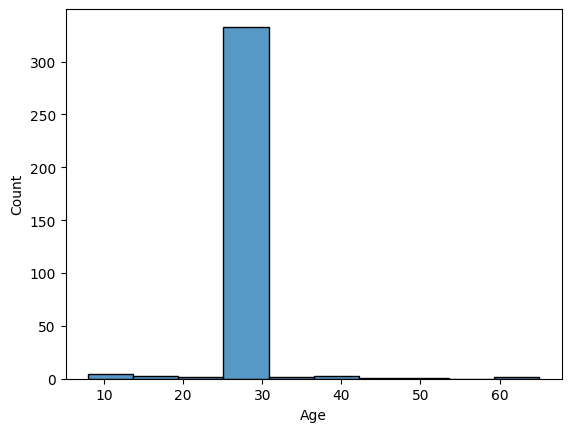

In [ ]:
# Concatenate the resampled datasets
sns.histplot(data=combined_df, x="Age", bins=10)
plt.show()


In [ ]:
print(combined_df.columns)
print(synthetic_df.columns)


Index(['Year', 'Funding levels', 'staffing levels', 'Patient outcome',
       'Emergency referall', 'Discharges', 'Associated emergency readmissions',
       'Urgent crisis referalls', 'Access_to_care_waiting_time', 'Geographic',
       'Geographic-1', 'Gender', 'Age', 'Indicator_value_patient_satisfaction',
       'Indicator_value_Policy_changes', 'Region',
       'num_professionals_pre_cuts', 'num_professionals_post_cuts',
       'avg_cost_per_professional'],
      dtype='object')
Index(['col1', 'col2'], dtype='object')


In [ ]:
print(combined_df.columns)


Index(['Year', 'Funding levels', 'staffing levels', 'Patient outcome',
       'Emergency referall', 'Discharges', 'Associated emergency readmissions',
       'Urgent crisis referalls', 'Access_to_care_waiting_time', 'Geographic',
       'Geographic-1', 'Gender', 'Age', 'Indicator_value_patient_satisfaction',
       'Indicator_value_Policy_changes', 'Region',
       'num_professionals_pre_cuts', 'num_professionals_post_cuts',
       'avg_cost_per_professional'],
      dtype='object')


#**Geographic Analysis**

In [ ]:
print(combined_df[['Indicator_value_patient_satisfaction', 'Geographic-1']])


     Indicator_value_patient_satisfaction Geographic-1
3                               87.100000       Barnet
4                               81.600000     Barnsley
5                               85.900000     Basildon
6                               86.900000    Bassetlaw
7                               89.000000         Bath
..                                    ...          ...
349                             86.522374     Daventry
350                             86.522374         Deal
351                             86.522374        Derry
352                             86.522374      Dereham
353                             86.522374    Doncaster

[351 rows x 2 columns]


In [ ]:
print(combined_df.dtypes)


Year                                    float64
Funding levels                          float64
staffing levels                         float64
Patient outcome                         float64
Emergency referall                      float64
Discharges                              float64
Associated emergency readmissions       float64
Urgent crisis referalls                 float64
Access_to_care_waiting_time             float64
Geographic                               object
Geographic-1                             object
Gender                                   object
Age                                     float64
Indicator_value_patient_satisfaction    float64
Indicator_value_Policy_changes            int64
Region                                   object
num_professionals_pre_cuts              float64
num_professionals_post_cuts             float64
avg_cost_per_professional               float64
dtype: object


In [ ]:
# Convert column to numeric
combined_df['Indicator_value_patient_satisfaction'] = pd.to_numeric(combined_df['Indicator_value_patient_satisfaction'], errors='coerce')

# Now can fill the NaNs
combined_df['Indicator_value_patient_satisfaction'] = combined_df['Indicator_value_patient_satisfaction'].fillna(combined_df['Indicator_value_patient_satisfaction'].mean())


In [ ]:
import seaborn as sns

# Extract data for 'Indicator_value_patient_satisfaction' and 'Geographic-1' from combined_df
df_plot = combined_df[['Indicator_value_patient_satisfaction', 'Geographic-1']]

# Calculate the mean satisfaction for each region
df_plot = df_plot.groupby('Geographic-1').mean().reset_index()
print(df_plot)




    Geographic-1  Indicator_value_patient_satisfaction
0         Antrim                             86.522374
1       Arbroath                             86.522374
2         Armagh                             86.522374
3            Ayr                             86.522374
4      Banbridge                             86.522374
..           ...                                   ...
276     Worthing                             86.522374
277      Wrexham                             86.522374
278         Wyre                             84.200000
279       Yeovil                             86.522374
280         York                             86.522374

[281 rows x 2 columns]


In [ ]:
# Sort by satisfaction and take the top 20 regions
df_plot = df_plot.sort_values('Indicator_value_patient_satisfaction', ascending=False).head(20)
print(df_plot)



      Geographic-1  Indicator_value_patient_satisfaction
144      Lichfield                             91.000000
119       Haringey                             90.900000
226          Stoke                             90.700000
176       Nuneaton                             90.500000
155     Manchester                             90.200000
193         Ribble                             89.900000
208         Slough                             89.900000
110      Gravesham                             89.800000
160  Middlesbrough                             89.800000
202       Sandwell                             89.600000
242         Thanet                             89.400000
94      Derbyshire                             89.300000
157         Medway                             89.300000
192        Rhondda                             89.300000
170        Newport                             89.200000
221       Stafford                             89.161187
98       Districts             

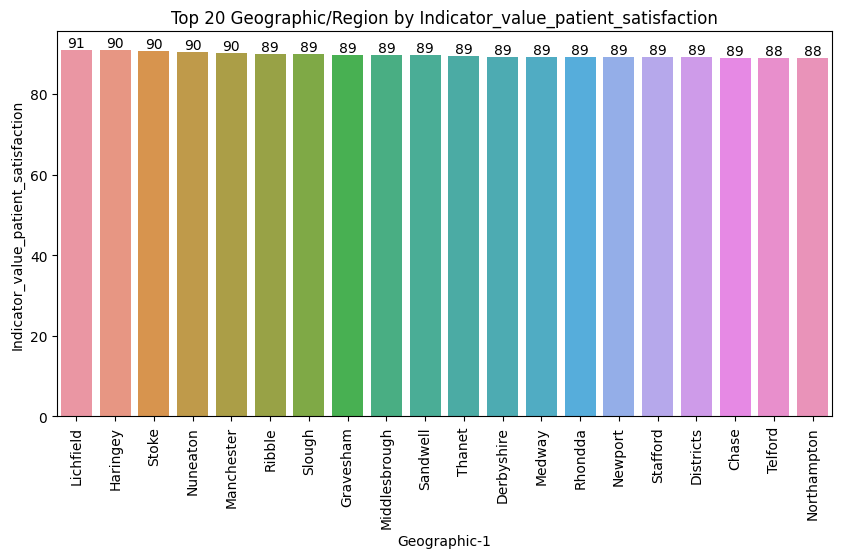

In [ ]:
plt.figure(figsize=(10,5))
barplot = sns.barplot(x='Geographic-1', y='Indicator_value_patient_satisfaction', data=df_plot)
plt.title('Top 20 Geographic/Region by Indicator_value_patient_satisfaction')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Add labels to the top of the bars
for bar in barplot.patches:
    barplot.text(x = bar.get_x() + bar.get_width() / 2,
                 y = bar.get_height(),
                 s = f'{int(bar.get_height())}',
                 ha = 'center',
                 va = 'bottom')

plt.show()


#**Time series Analysis**

In [ ]:
import pandas as pd

# Convert the 'Year' column to datetime format and set it as the index
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

# Sort the DataFrame by date
df.sort_index(inplace=True)


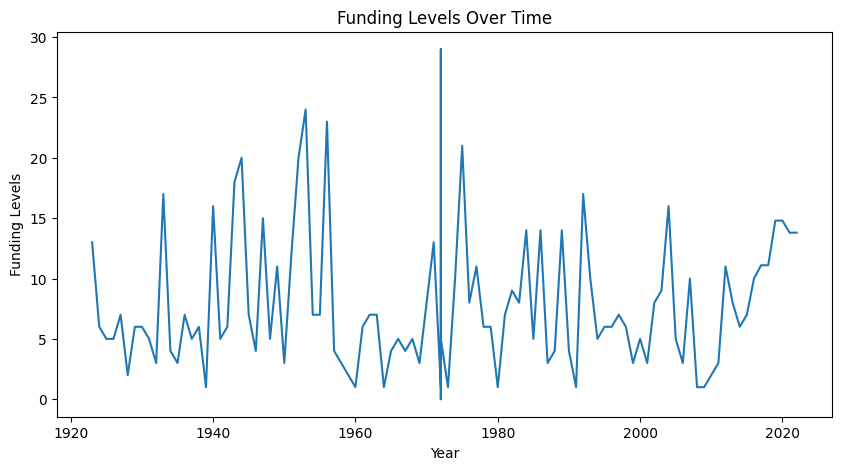

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['Funding levels'])
plt.title('Funding Levels Over Time')
plt.xlabel('Year')
plt.ylabel('Funding Levels')
plt.show()




## **Arima Model Summary for Funding Levels**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Funding levels'], order=(1, 1, 1))
results = model.fit()
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:         Funding levels   No. Observations:                  354
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1062.148
Date:                Sun, 30 Jul 2023   AIC                           2130.296
Time:                        17:11:54   BIC                           2141.896
Sample:                             0   HQIC                          2134.912
                                - 354                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1570      0.047      3.369      0.001       0.066       0.248
ma.L1         -1.0000      2.740     -0.365      0.715      -6.370       4.370
sigma2        23.6717     65.373      0.362      0.7

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


#**Forecasting Analysis**

354    8.415420
355    7.569916
356    7.437153
357    7.416306
358    7.413032
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


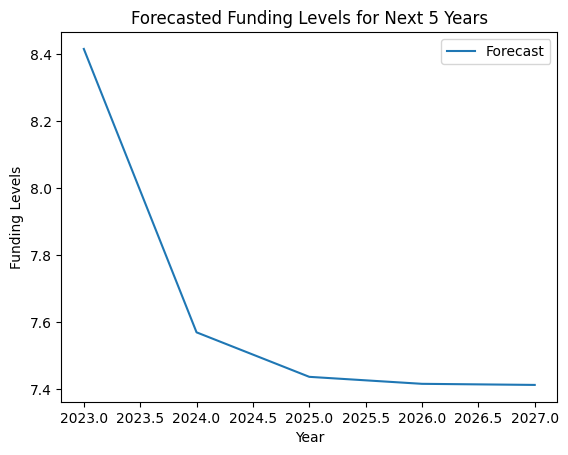

In [ ]:
# Forecasting
forecast = results.forecast(steps=5)
print(forecast)

# Plot the forecasted values
forecast_years = range(2023, 2028) # create a list of next 5 years
forecast.index = forecast_years # set the list as the index of the forecast series
plt.plot(forecast, label='Forecast')
plt.title('Forecasted Funding Levels for Next 5 Years')
plt.xlabel('Year')
plt.ylabel('Funding Levels')
plt.legend()
plt.show()


#**Policy Changes Analysis**

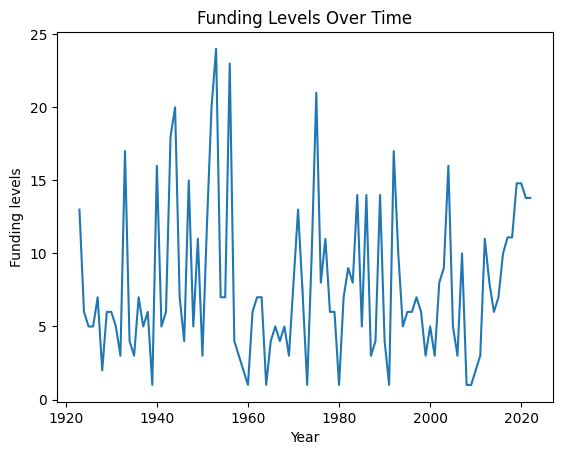

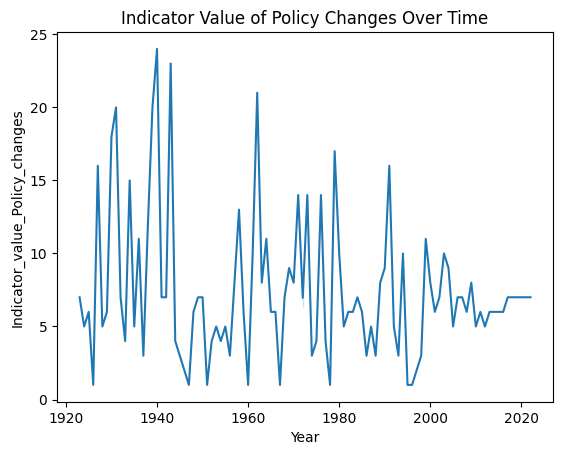

In [ ]:
sns.lineplot(x='Year', y='Funding levels', data=df)
plt.title('Funding Levels Over Time')
plt.show()
sns.lineplot(x='Year', y='Indicator_value_Policy_changes', data=df)
plt.title('Indicator Value of Policy Changes Over Time')
plt.show()


In [ ]:
combined_df.columns


Index(['Year', 'Funding levels', 'staffing levels', 'Patient outcome',
       'Emergency referall', 'Discharges', 'Associated emergency readmissions',
       'Urgent crisis referalls', 'Access_to_care_waiting_time', 'Geographic',
       'Geographic-1', 'Gender', 'Age', 'Indicator_value_patient_satisfaction',
       'Indicator_value_Policy_changes', 'Region',
       'num_professionals_pre_cuts', 'num_professionals_post_cuts',
       'avg_cost_per_professional'],
      dtype='object')

In [ ]:
print(combined_df.dtypes)


Year                                    float64
Funding levels                          float64
staffing levels                         float64
Patient outcome                         float64
Emergency referall                      float64
Discharges                              float64
Associated emergency readmissions       float64
Urgent crisis referalls                 float64
Access_to_care_waiting_time             float64
Geographic                               object
Geographic-1                             object
Gender                                   object
Age                                     float64
Indicator_value_patient_satisfaction    float64
Indicator_value_Policy_changes            int64
Region                                   object
num_professionals_pre_cuts              float64
num_professionals_post_cuts             float64
avg_cost_per_professional               float64
dtype: object


In [ ]:
# Filling missing values with mean
combined_df.fillna(combined_df.mean(), inplace=True)

<ipython-input-346-77ec35e7f255>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  combined_df.fillna(combined_df.mean(), inplace=True)


In [ ]:
# Check for missing values in each column of the DataFrame
missing_values = combined_df.isna().sum()

print(missing_values)


Year                                    0
Funding levels                          0
staffing levels                         0
Patient outcome                         0
Emergency referall                      0
Discharges                              0
Associated emergency readmissions       0
Urgent crisis referalls                 0
Access_to_care_waiting_time             0
Geographic                              0
Geographic-1                            0
Gender                                  0
Age                                     0
Indicator_value_patient_satisfaction    0
Indicator_value_Policy_changes          0
Region                                  0
num_professionals_pre_cuts              0
num_professionals_post_cuts             0
avg_cost_per_professional               0
dtype: int64


In [ ]:
print(combined_df.columns)


Index(['Year', 'Funding levels', 'staffing levels', 'Patient outcome',
       'Emergency referall', 'Discharges', 'Associated emergency readmissions',
       'Urgent crisis referalls', 'Access_to_care_waiting_time', 'Geographic',
       'Geographic-1', 'Gender', 'Age', 'Indicator_value_patient_satisfaction',
       'Indicator_value_Policy_changes', 'Region',
       'num_professionals_pre_cuts', 'num_professionals_post_cuts',
       'avg_cost_per_professional'],
      dtype='object')


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from math import sqrt

# Numerical features
num_variables = ['Year', 'Funding levels', 'staffing levels', 'Age'] # Add or remove features according to dataset
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_variables)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
reg1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', SVR(C=1.0, epsilon=0.2))]) # SVR model

reg2 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', Ridge())]) # Ridge model

X = combined_df.drop('Patient outcome', axis=1)
y = combined_df['Patient outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the models
reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)

# Predict on test data
y_pred_svr = reg1.predict(X_test)
y_pred_ridge = reg2.predict(X_test)

# Compute metrics
mse_svr = mean_squared_error(y_test, y_pred_svr)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

rmse_svr = sqrt(mse_svr)
rmse_ridge = sqrt(mse_ridge)

mae_svr = mean_absolute_error(y_test, y_pred_svr)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

r2_svr = r2_score(y_test, y_pred_svr)
r2_ridge = r2_score(y_test, y_pred_ridge)

ev_svr = explained_variance_score(y_test, y_pred_svr)
ev_ridge = explained_variance_score(y_test, y_pred_ridge)

print('SVR Metrics:')
print('Mean Squared Error:', mse_svr)
print('Root Mean Squared Error:', rmse_svr)
print('Mean Absolute Error:', mae_svr)
print('R-squared:', r2_svr)
print('Explained Variance:', ev_svr)

print('\nRidge Metrics:')
print('Mean Squared Error:', mse_ridge)
print('Root Mean Squared Error:', rmse_ridge)
print('Mean Absolute Error:', mae_ridge)
print('R-squared:', r2_ridge)
print('Explained Variance:', ev_ridge)


SVR Metrics:
Mean Squared Error: 830590.6505413707
Root Mean Squared Error: 911.3674618623219
Mean Absolute Error: 679.1436338639842
R-squared: -0.018262102823127124
Explained Variance: 0.009916015962693647

Ridge Metrics:
Mean Squared Error: 575827.7164268084
Root Mean Squared Error: 758.8331281822166
Mean Absolute Error: 564.1806419996265
R-squared: 0.2940643612946662
Explained Variance: 0.32497104626257545


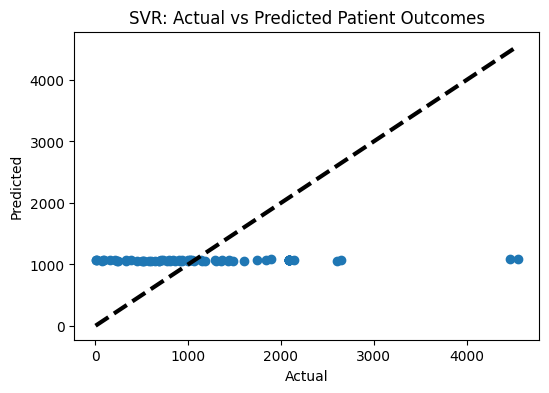

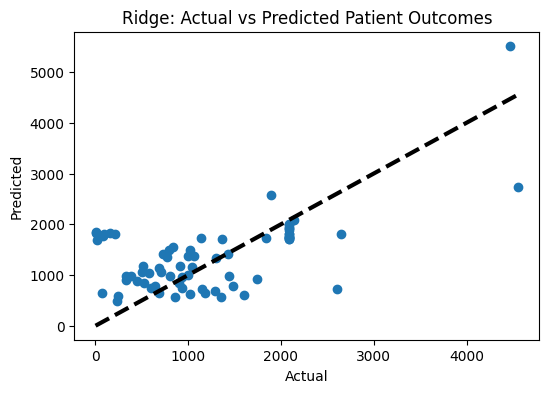

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for SVR model
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_svr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR: Actual vs Predicted Patient Outcomes')
plt.show()

# Scatter plot for Ridge model
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_ridge)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge: Actual vs Predicted Patient Outcomes')
plt.show()


<ipython-input-351-d0d813d3a9cb>:16: RuntimeWarning: invalid value encountered in log
  rects1 = ax.bar(x - width/2, np.log(metrics_svr), width, label='SVR', color='r')


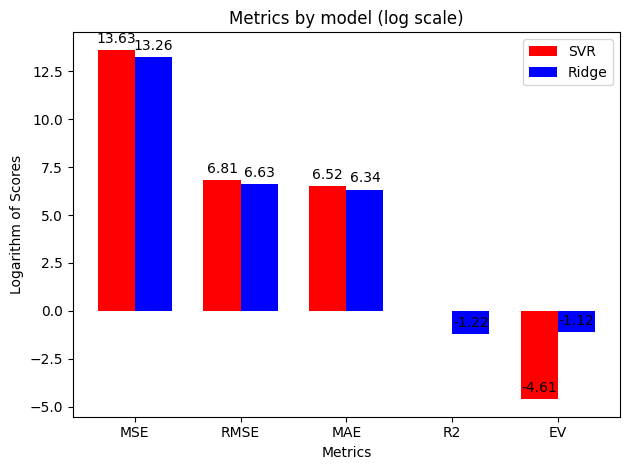

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for both models
metrics_svr = [mse_svr, rmse_svr, mae_svr, r2_svr, ev_svr]
metrics_ridge = [mse_ridge, rmse_ridge, mae_ridge, r2_ridge, ev_ridge]

# Bar plot
labels = ['MSE', 'RMSE', 'MAE', 'R2', 'EV']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

# Create bars for SVR
rects1 = ax.bar(x - width/2, np.log(metrics_svr), width, label='SVR', color='r')

# Create bars for Ridge
rects2 = ax.bar(x + width/2, np.log(metrics_ridge), width, label='Ridge', color='b')

# Function to add value annotations on top of each bar
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.2f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Logarithm of Scores')
ax.set_title('Metrics by model (log scale)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Create a dictionary
data = {
    'Region': np.random.choice(['London', 'Midlands', 'North East', 'North West', 'South East', 'South West'], 500),
    'PatientFeedback': np.random.choice([
        'I am really happy with the service.',
        'The waiting time was too long, I am not satisfied.',
        'The staff were very kind and understanding, great service!',
        'I am not happy with the treatment I received.',
        'The facility was under-staffed, it needs improvement.',
        'The mental health services are excellent here.',
        'I had a poor experience, the service was not up to the mark.',
        'The professionals were very helpful and understanding, kudos to them.',
        'I had to wait for several months before getting the service, it was frustrating.',
        'The services are great, I had a good experience.'
    ], 500)
}

# Create a DataFrame
feedback_df = pd.DataFrame(data)

print(feedback_df.head())


       Region                                    PatientFeedback
0      London  I had to wait for several months before gettin...
1    Midlands                I am really happy with the service.
2      London  The professionals were very helpful and unders...
3  North West  I had to wait for several months before gettin...
4  North East  I had to wait for several months before gettin...


hypothetical feedback from patients about their experience with mental health services.

In [ ]:
combined_df.columns



Index(['Year', 'Funding levels', 'staffing levels', 'Patient outcome',
       'Emergency referall', 'Discharges', 'Associated emergency readmissions',
       'Urgent crisis referalls', 'Access_to_care_waiting_time', 'Geographic',
       'Geographic-1', 'Gender', 'Age', 'Indicator_value_patient_satisfaction',
       'Indicator_value_Policy_changes', 'Region',
       'num_professionals_pre_cuts', 'num_professionals_post_cuts',
       'avg_cost_per_professional'],
      dtype='object')

In [ ]:
feedback_df.columns

Index(['Region', 'PatientFeedback'], dtype='object')

In [ ]:
!pip install nltk

In [ ]:
print("Columns in combined_df:", combined_df.columns)
print("Columns in feedback_df:", feedback_df.columns)


Columns in combined_df: Index(['Year', 'Funding levels', 'staffing levels', 'Patient outcome',
       'Emergency referall', 'Discharges', 'Associated emergency readmissions',
       'Urgent crisis referalls', 'Access_to_care_waiting_time', 'Geographic',
       'Geographic-1', 'Gender', 'Age', 'Indicator_value_patient_satisfaction',
       'Indicator_value_Policy_changes', 'Region',
       'num_professionals_pre_cuts', 'num_professionals_post_cuts',
       'avg_cost_per_professional'],
      dtype='object')
Columns in feedback_df: Index(['Region', 'PatientFeedback'], dtype='object')


In [ ]:
import pandas as pd
from textblob import TextBlob

# Sample data for demonstration purposes, replace with actual data from dataframe
combined_df_data = {
    'Year': [2021, 2022, 2021, 2022, 2022],
    'Funding levels': [1000, 1500, 900, 1200, 1300],
    'staffing levels': [0.8, 0.9, 0.7, 0.8, 0.85],
    'Region': ['Midlands', 'London', 'North West', 'North East', 'London']
}

feedback_df_data = {
    'Region': ['Midlands', 'London', 'North West', 'North East', 'London'],
    'PatientFeedback': [
        "I am really happy with the service.",
        "The professionals were very helpful and understanding.",
        "I had to wait for several months before getting an appointment.",
        "I had to wait for several months before getting an appointment.",
        "I am really happy with the service."
    ]
}

combined_df = pd.DataFrame(combined_df_data)
feedback_df = pd.DataFrame(feedback_df_data)

# Perform sentiment analysis using TextBlob
feedback_df['Sentiment'] = feedback_df['PatientFeedback'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Merge the sentiment analysis results into 'combined_df' based on 'Region'
combined_df = combined_df.merge(feedback_df[['Region', 'Sentiment']], on='Region', how='left')

# Now have the 'combined_df' with sentiment analysis results included.
print(combined_df)


   Year  Funding levels  staffing levels      Region  Sentiment
0  2021            1000             0.80    Midlands        0.8
1  2022            1500             0.90      London        0.2
2  2022            1500             0.90      London        0.8
3  2021             900             0.70  North West        0.0
4  2022            1200             0.80  North East        0.0
5  2022            1300             0.85      London        0.2
6  2022            1300             0.85      London        0.8


In [ ]:
pip install vaderSentiment


In [ ]:
df = pd.read_excel('/content/MHD.xlsx')

In [ ]:
df.columns

Index(['Year', 'Funding levels', 'staffing levels', 'Patient outcome',
       'Emergency referall', 'Discharges', 'Associated emergency readmissions',
       'Urgent crisis referalls', 'Access_to_care_waiting_time', 'Geographic',
       'Geographic-1', 'Gender', 'Age', 'Indicator_value_patient_satisfaction',
       'Indicator_value_Policy_changes', 'Region'],
      dtype='object')

In [ ]:
df.shape

(354, 16)

In [ ]:
print(df.dtypes)


Year                                    float64
Funding levels                          float64
staffing levels                          object
Patient outcome                          object
Emergency referall                      float64
Discharges                              float64
Associated emergency readmissions       float64
Urgent crisis referalls                 float64
Access_to_care_waiting_time             float64
Geographic                               object
Geographic-1                             object
Gender                                   object
Age                                     float64
Indicator_value_patient_satisfaction     object
Indicator_value_Policy_changes            int64
Region                                   object
dtype: object


In [ ]:
print(df['Year'].head(20))


0     2022.0
1     2021.0
2     2020.0
3     2019.0
4     2018.0
5     2017.0
6     2016.0
7     2015.0
8     2014.0
9     2013.0
10    2012.0
11    2011.0
12    2010.0
13    2009.0
14    2008.0
15    2007.0
16    2006.0
17    2005.0
18    2004.0
19    2003.0
Name: Year, dtype: float64


In [ ]:
pip install nltk


In [ ]:
pip install nltk


In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Assuming "df" is existing DataFrame with the "PatientFeedback" column

# Generate random text entries for the "PatientFeedback" column
feedback_choices = [
    'I am really happy with the service.',
    'The waiting time was too long, I am not satisfied.',
    'The staff were very kind and understanding, great service!',
    'I am not happy with the treatment I received.',
    'The facility was under-staffed, it needs improvement.',
    'The mental health services are excellent here.',
    'I had a poor experience, the service was not up to the mark.',
    'The professionals were very helpful and understanding, kudos to them.',
    'I had to wait for several months before getting the service, it was frustrating.',
    'The services are great, I had a good experience.'
]

np.random.seed(42)  # For reproducibility
feedback_data = np.random.choice(feedback_choices, 354)

# Add the "PatientFeedback" column to the DataFrame "df"
df['PatientFeedback'] = feedback_data

# Perform sentiment analysis using VADER SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment score for each feedback
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the sentiment analysis function to each feedback and create a new column "Sentiment"
df['Sentiment'] = df['PatientFeedback'].apply(get_sentiment_score)

# Display the DataFrame with the "Sentiment" column added
print(df[['Year', 'Region', 'PatientFeedback', 'Sentiment']].head(10))


     Year Region                                    PatientFeedback  Sentiment
0  2022.0  North  I had a poor experience, the service was not u...    -0.4767
1  2021.0  South      I am not happy with the treatment I received.    -0.4585
2  2020.0   East  The professionals were very helpful and unders...     0.7501
3  2019.0   West  The facility was under-staffed, it needs impro...     0.4588
4  2018.0  North  I had a poor experience, the service was not u...    -0.4767
5  2017.0  South   The services are great, I had a good experience.     0.7906
6  2016.0   East  The staff were very kind and understanding, gr...     0.8436
7  2015.0   West  I had a poor experience, the service was not u...    -0.4767
8  2014.0  North  The professionals were very helpful and unders...     0.7501
9  2013.0  South  The facility was under-staffed, it needs impro...     0.4588


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
